In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#use case person will exit the bank or not

#divide dataset independent and independent features
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
X['geography']= label_encoder.fit_transform(X['Geography'])

X['gender']= label_encoder.fit_transform(X['Gender'])

In [18]:
#feature engineering
# geography=pd.get_dummies(X['Geography'],drop_first=True)
# gender=pd.get_dummies(X['Gender'],drop_first=True)

In [19]:
#concatenate variables
X=X.drop(['Geography','Gender'],axis=1)

In [20]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geography,gender
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0


In [21]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.10643166,
         1.51919821, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.74866447,
         0.3131264 ,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ...,  1.48533467,
        -0.89294542, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  1.41231994,
        -0.89294542,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.84432121,
         1.51919821, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.32472465,
         0.3131264 , -1.09168714]])

In [25]:
X_train.shape

(8000, 10)

In [26]:
#Creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LeakyReLU,ReLU,ELU,PReLU,Dropout




In [27]:
#initilize ANN
classifier=Sequential()

In [29]:
#adding input layer
classifier.add(Dense(units=10,activation='relu'))

In [30]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [31]:
#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [32]:
#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [33]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
#early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [35]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01,)

In [41]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3090 - accuracy: 0.8673 - val_loss: 0.3895 - val_accuracy: 0.8417
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3093 - accuracy: 0.8729 - val_loss: 0.3964 - val_accuracy: 0.8448
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3079 - accuracy: 0.8727 - val_loss: 0.3992 - val_accuracy: 0.8444
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3088 - accuracy: 0.8688 - val_loss: 0.3956 - val_accuracy: 0.8429
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3080 - accuracy: 0.8696 - val_loss: 0.4029 - val_accuracy: 0.8421
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3084 - accuracy: 0.8703 - val_loss: 0.3995 - val_accuracy: 0.8436
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3079 - accuracy: 0.8694 - val_loss: 0.3990 - val_accuracy:

In [42]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


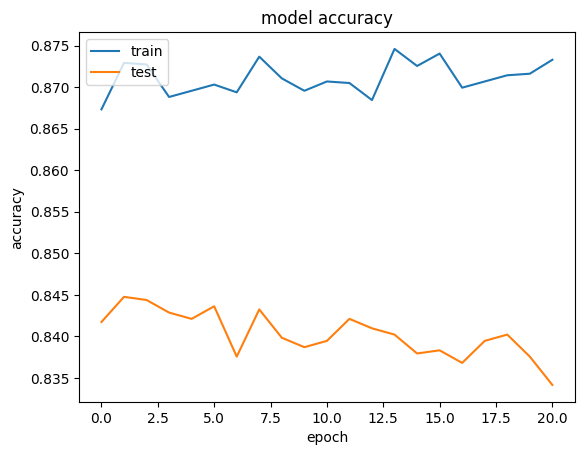

In [43]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

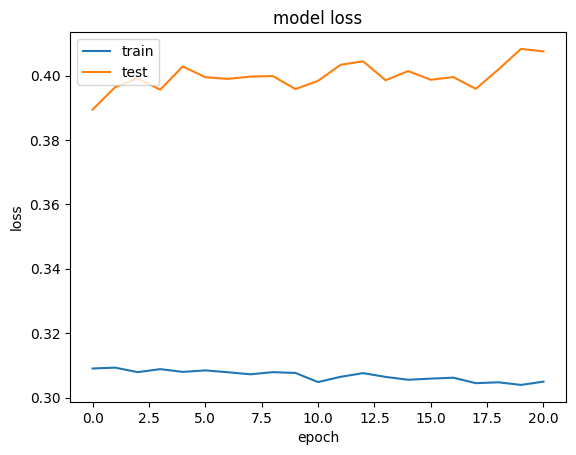

In [44]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
#make predictions and model evaluation
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1487,  108],
       [ 203,  202]])

In [49]:
#Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.8445

In [51]:
#get the weights
classifier.get_weights()

[array([[-0.40583956, -0.03368364,  0.06743752,  0.3440202 ,  0.13584706,
         -0.13011608,  0.10452584, -0.12940985,  0.06634916, -0.0338164 ,
         -0.09414978],
        [-0.6041124 ,  0.05860354,  0.36854863, -0.92557454, -0.66035926,
          0.6232354 , -0.63475424, -0.76593506,  0.3265453 ,  0.20489046,
         -0.22126691],
        [-0.10175173,  0.318097  ,  0.14793943, -0.2242715 ,  0.13187903,
          0.01299972, -0.16798933,  0.13059363,  0.09353479,  0.4113546 ,
          0.02417433],
        [ 0.6365402 , -0.8727721 , -0.47774777, -0.57143825,  0.00927397,
          0.71629953,  0.8466481 ,  0.31084982,  0.06227653, -0.011774  ,
         -0.34576416],
        [-0.07504486,  0.07253822,  0.2528541 ,  0.4719928 ,  0.17504807,
         -0.18689072, -0.07878606,  0.7488923 ,  1.3392947 , -0.13026175,
         -0.59868735],
        [ 0.21825099, -0.17654327, -0.00368815, -0.1065874 , -0.12897192,
          0.13483979,  0.1257215 ,  0.04377124,  0.01394807,  0.1688927